### import needed packages for visualization

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set_style('whitegrid')
%matplotlib inline

### load data

In [3]:
df = pd.read_csv('profiles.csv')

### check existing features

In [4]:
df.keys()

Index([u'age', u'body_type', u'diet', u'drinks', u'drugs', u'education',
       u'essay0', u'essay1', u'essay2', u'essay3', u'essay4', u'essay5',
       u'essay6', u'essay7', u'essay8', u'essay9', u'ethnicity', u'height',
       u'income', u'job', u'last_online', u'location', u'offspring',
       u'orientation', u'pets', u'religion', u'sex', u'sign', u'smokes',
       u'speaks', u'status'],
      dtype='object')

### graph 1:


###  height distribution of men,according to age class
we can see more divergence in the younge ages,and that the between 30-40 are the tallest among all classes

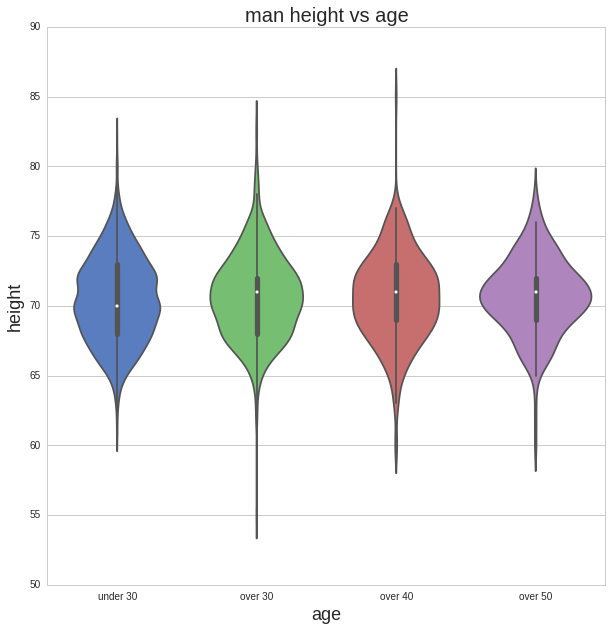

In [6]:
plt.figure(figsize=(10,10))
def age_map(x):
    if x>50:
        return 'over 50'
    elif 40<x<50:
        return 'over 40'
    elif 30<x<40:
        return 'over 30'
    else:
        return 'under 30'

man = pd.DataFrame(df[(df['sex']=='m')  & (df['height']>50) & (df['height']<90)])
man['age class'] =man['age'].apply(age_map) 
sns.violinplot(x="age class", y="height",data=man.dropna(), palette="muted",orient="v")
plt.xlabel( 'age',fontsize=18)
plt.ylabel( 'height',fontsize=18)
plt.title( 'man height vs age',fontsize=20)



### graph 2:

### corralation between age and drug using in man population
   1. we can see that across all ages, nearly no-one defines himself "sometimes" smoker- you smoke often or not at all.
   2. In addition, we can see a nice gradient as we go to the younger man, they are more smoking than the elders.

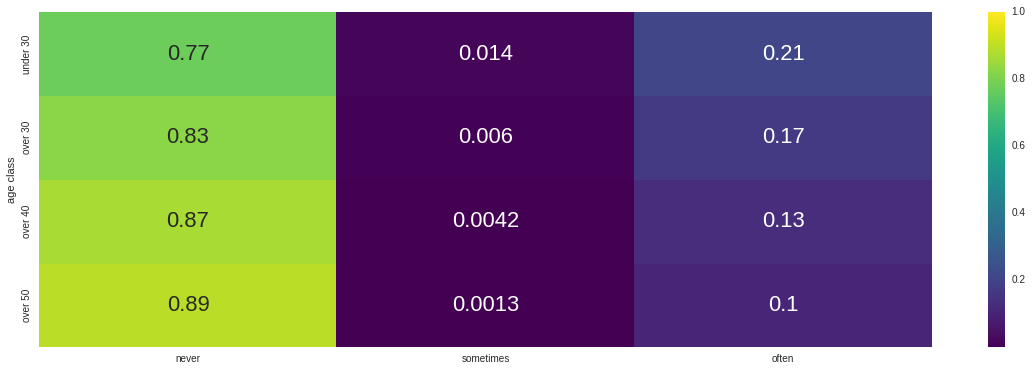

In [255]:
age_groupby = man.groupby('age class')['drugs'].value_counts(normalize=True)
age_groupby = age_groupby.unstack().dropna(axis=1)
age_groupby.columns = ['never','sometimes','often']
a = age_groupby.reindex(['under 30','over 30','over 40','over 50'])
plt.figure(figsize=(20,6))
sns.heatmap(a,cmap='viridis',vmax = 1, annot = True)


### graph 3:


### revealing the yearly income by profession


1. we can see that about 80% in each profession didn't wanted to reveal their income.
2. we can see 2 exceptions:


    2.1 half of the military man and women did revealed their income
    2.2 almost 90% of people who didn't revealed their profession(left black field under 'job'), didn't revealed their income

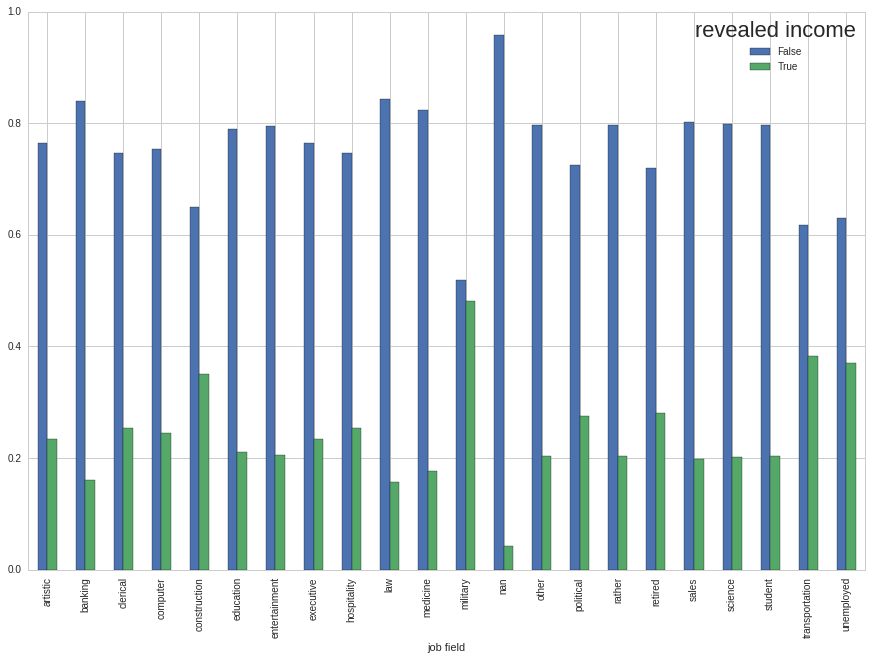

In [230]:


df['revealed income'] = df['income'] != -1
df['job field'] = df['job'].apply(lambda x: str(x).split()[0])

df.head()
revealed_income = pd.DataFrame(df[['revealed income','job field']])


group=revealed_income.groupby('job field')['revealed income'].value_counts(normalize=True)
group = group.unstack().plot(kind='bar',figsize=(15, 10))




### graph 4: incomes of realistics jobs vs entertainment jobs

we saw in the earlier graph that in most jobs 80% didn't wanted to reveal their income.
I took the population that did reveal her income, and did a comparation between the income in jobs that are in the realistic world (science,hitech,computer) and the income in the entertainment world(art,entertainment).
we can see that most of the entertainment people income is in the 20k-40k a year, while most of the realistic people earn 50-100k.
with that said, there are more people in the entertainment world who earn the "big money" (500k-1000k) in a year, so it is a gamble that can pay of..

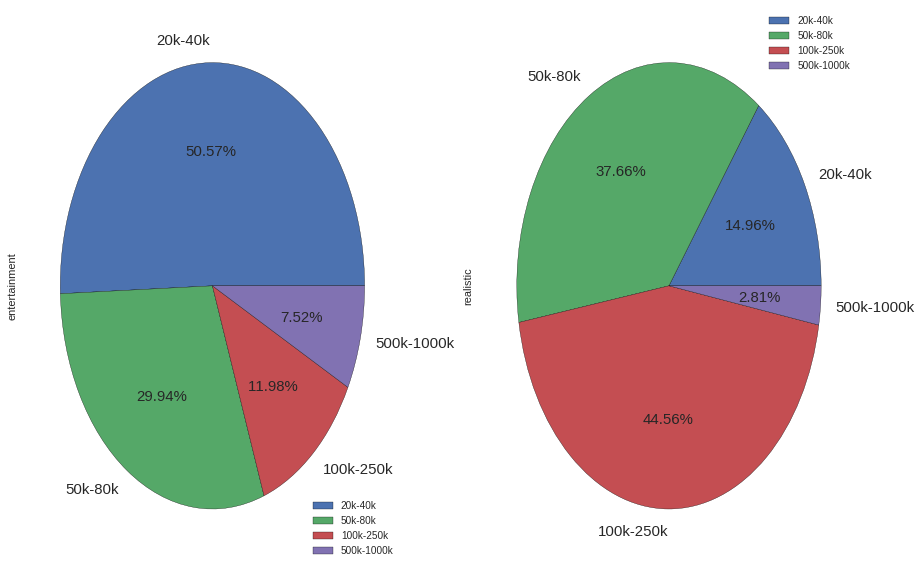

In [280]:
job_field = {'computer':'realistic','science':'realistic','artistic':'entertainment','entertainment':'entertainment'}
sorted(df['income'].unique())
def income_category(x):
    if x<=40000:
        return '20k-40k'
    elif 50000<=x<=80000:
        return '50k-80k'
    elif 100000<=x<=250000:
        return '100k-250k'
    else:
        return '500k-1000k'

answered_income = pd.DataFrame(df[df['income'] != -1])
answered_income['job field general'] = answered_income['job field'].map(job_field)
answered_income['income_category'] = answered_income['income'].apply(income_category)
income_job_field = answered_income[['income_category','job field general']]
group=income_job_field.groupby('job field general')['income_category'].value_counts(normalize=True)
group.head()
group = group.reindex(['20k-40k','50k-80k','100k-250k','500k-1000k'],level=1)
group = group.unstack().T.plot.pie(figsize=(15,10),legend=True,autopct='%.2f%%',fontsize=15,subplots=True)


### graph 5: body imaging

the third essay question was "The first thing people usually notice about me"

I took the people that said that their body is the first thing people notices and checked the body type of these people. 
I compared it vs people who choose other answers.


we can see that more people who answered "their body",compared to the other people, have body image of fat person or an athletic one, and less thin or normal image. 
it make sense. if you don't appreciate your body,or highly appreciate it, it is likely you will think other people will look at you the same way.

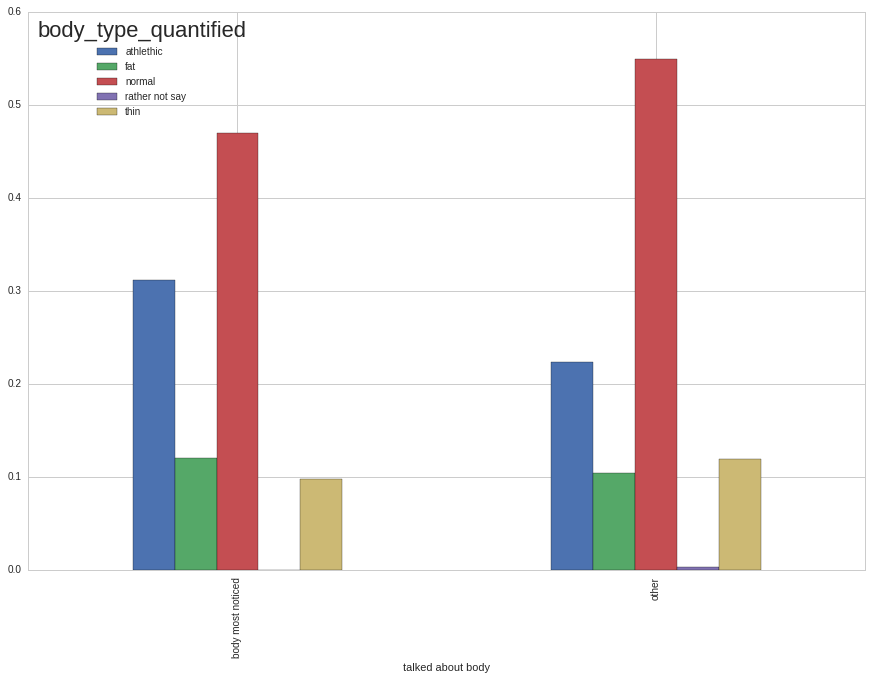

In [317]:
body_types = {'curvy':'fat','full figured':'fat','a little extra':'normal','average':'normal','fit':'normal','athletic':'athlethic','jacked':'athlethic'
              ,'skinny':'thin','thin':'thin','rather not say':'rather not say','used up':'fat','overweight':'fat'}

df['body_type'].unique()
def talked_about_body(x):
    return "body most noticed" if 'body' in str(x)  else "other"

df['body_type_quantified'] = df['body_type'].map(body_types)
df['talked about body'] = df['essay3'].apply(talked_about_body)
#df['talked about body'].value_counts()
body_types = df.groupby('talked about body')['body_type_quantified'].value_counts(normalize=True)
group = body_types.unstack().plot(kind='bar',figsize=(15, 10))

